# Credit Risk Evaluator

In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
# Import the KNN classifier model from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [7]:
# Import the data
file_path = Path("Resources/lending_data.csv")
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [8]:
df.shape 

(77536, 8)

In [9]:
# declare y and x 
y= df['loan_status'].values
X=df.drop('loan_status',axis=1)

In [10]:
print(y)

[0 0 0 ... 1 1 1]


In [11]:
X.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
5,10100.0,7.438,50600,0.407115,4,1,20600
6,10300.0,7.490,51100,0.412916,4,1,21100
7,8800.0,6.857,45100,0.334812,3,0,15100
8,9300.0,7.096,47400,0.367089,3,0,17400
9,9700.0,7.248,48800,0.385246,4,0,18800


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

My assumption is that Random Forest Classifer will perfome better than the Logistic Regression. Because such a large dataset, Random Forests chooose the optimal spilit point for each decision. 

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [12]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [14]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [15]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [16]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9941188609162196
Testing Data Score: 0.9941704498555509


In [17]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[18690,   102],
       [   11,   581]], dtype=int64)

In [18]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.98      0.91       592

    accuracy                           0.99     19384
   macro avg       0.93      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



k: 1, Train/Test Score: 0.996/0.990
k: 3, Train/Test Score: 0.995/0.993
k: 5, Train/Test Score: 0.995/0.994
k: 7, Train/Test Score: 0.994/0.994
k: 9, Train/Test Score: 0.994/0.994
k: 11, Train/Test Score: 0.994/0.995
k: 13, Train/Test Score: 0.994/0.995
k: 15, Train/Test Score: 0.994/0.995
k: 17, Train/Test Score: 0.994/0.995
k: 19, Train/Test Score: 0.994/0.995


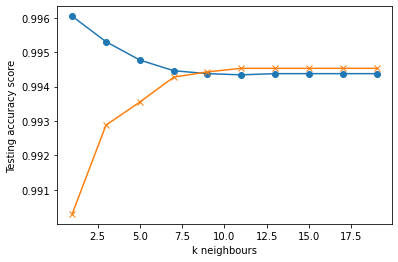

In [19]:
# Loop through different k values to find which has the highest accuracy.


train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbours")
plt.ylabel("Testing accuracy score")
plt.show()

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [28]:
knn_model.fit(X_train_scaled, y_train)
print("k=9 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=9 Test Acc: 0.994


In [29]:
knn_model.predict(X_test_scaled[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
# Import the roc_curve module from scikit-learn
from sklearn.metrics import roc_curve

In [31]:
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

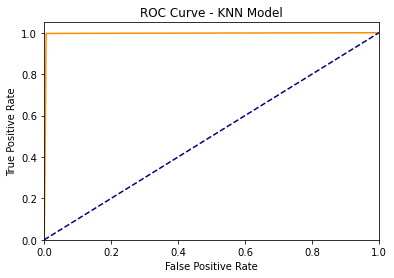

In [32]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

In [33]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9971970009629936
Testing Score: 0.991900536524969


In [ ]:
feature_importances = clf.feature_importances_
feature_importances

array([1.20268418e-01, 3.01393087e-01, 1.76271265e-01, 1.51317720e-01,
       1.11568592e-01, 1.18380419e-04, 1.39062538e-01])

In [ ]:
importances_df = pd.DataFrame({"features":X_train.columns, "importances": feature_importances})
importances_df = importances_df.sort_values("importances",ascending=True)
importances_df.set_index("features",inplace= True)
importances_df

,importances
features,
derogatory_marks,0.000118
num_of_accounts,0.111569
loan_size,0.120268
total_debt,0.139063
debt_to_income,0.151318
borrower_income,0.176271
interest_rate,0.301393


<AxesSubplot:ylabel='features'>

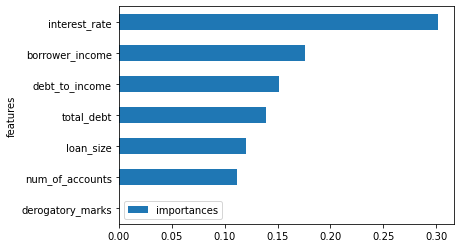

In [ ]:
importances_df.plot(kind='barh')


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

As we could see from the ananlysis above, the testing data score from Logistic Regression is 0.9941 while that from Random Forest is 0.9919. 
As a result, the Logistic Regression performed better. The ROC Curve shows us it is almost perfect. 
We could also observe that the all the important features listed in the bar above. Interest-rate is the most important features for the bank to consider whether or not to approve the loan.